**Selective Search**

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

loading a sample image

(2848, 4272, 3)


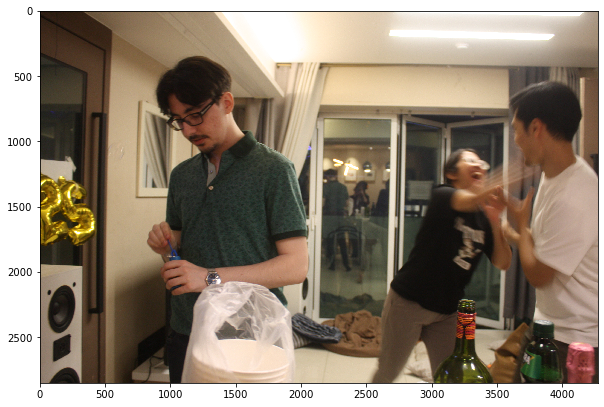

In [32]:
img = cv2.imread('./asset/sample_img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape) # pixel (2848x4272)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

when selectivesearch is not installed, run `pip install selectivesearch` in terminal

In [6]:
import selectivesearch as ss

_, regions = ss.selective_search(img, scale=100, min_size=2000)
print(type(regions), len(regions))
regions_rect = [i['rect'] for i in regions]

<class 'list'> 645


visualizing with bounding boxes

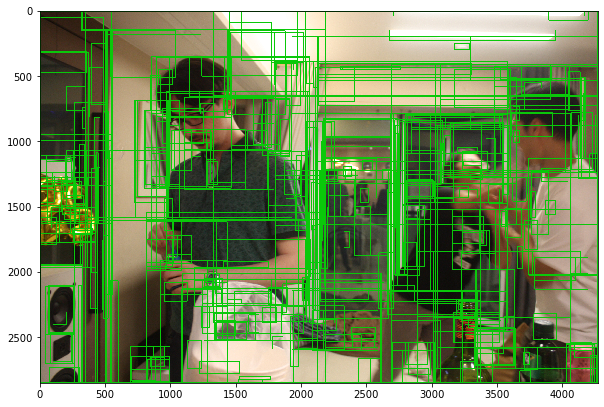

In [7]:
img_copy = img.copy()

for rect in regions_rect:
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]

    img_copy = cv2.rectangle(img_copy, (left, top), (right, bottom), color=(10, 200, 10), thickness=5)

plt.figure(figsize=(10,8))
plt.imshow(img_copy)
plt.show()

IoU (Intersection over Union)

In [8]:
import numpy as np

def find_iou(pred_box, actual_box):
    # intersecting 4 points
    x1 = np.maximum(pred_box[0], actual_box[0])
    y1 = np.maximum(pred_box[1], actual_box[1])
    x2 = np.maximum(pred_box[2], actual_box[2])
    y2 = np.maximum(pred_box[3], actual_box[3])
    intersection = np.maximum(x2-x1, 0) * np.maximum(y2-y1, 0)

    # finding union
    pred_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    actual_box = (actual_box[2] - actual_box[0]) * (actual_box[3] - actual_box[1])
    union = actual_box + pred_area - intersection

    # calculating iou
    iou = intersection / union
    return iou

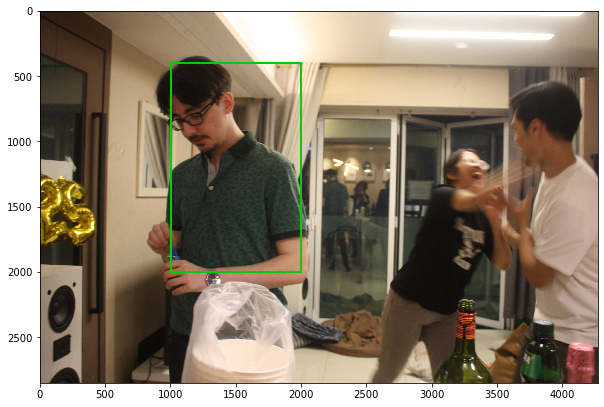

In [11]:
actual_box = [1000,400,2000,2000]

img = cv2.imread('./asset/sample_img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.rectangle(img, (actual_box[0], actual_box[1]), (actual_box[2], actual_box[3]), color=(10,200,10), thickness=15)
# img = cv2.rectangle(img, (100, 100), (1000, 1000), color=(255,0,0), thickness=3)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [12]:
regions_rect_100k = [i['rect'] for i in regions if i['size']>100000]
print(len(regions_rect_100k))

237


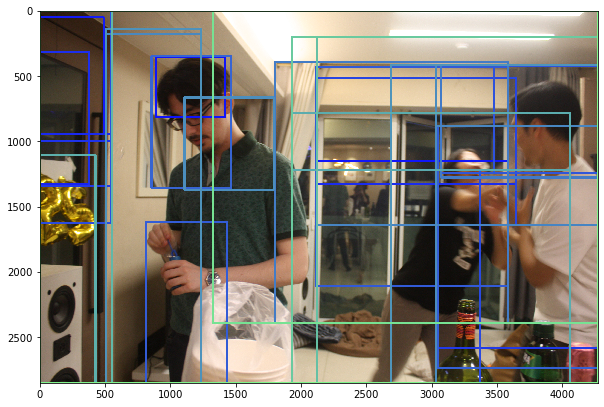

In [52]:
img = cv2.imread('./asset/sample_img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_copy = img.copy()
x = 0
for i, pred_box  in enumerate(regions_rect_100k):
    pred_box = list(pred_box)
    pred_box[2] += pred_box[0]
    pred_box[3] += pred_box[1]
    iou = find_iou(pred_box, actual_box)
    # print(iou)
    if iou > 1.0:
        x += 1
        img_copy = cv2.rectangle(img_copy,
                            (pred_box[0], pred_box[1]),
                            (pred_box[2], pred_box[3]),
                            color=(10+x,10+(2*x),255-x),
                            thickness=15)

plt.figure(figsize=(10,8))
plt.imshow(img_copy)
plt.show()

TODOs
- test IoU function